In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scanpy as sc
from matplotlib import rc_context

In [8]:
# from statannotations.Annotator import Annotator
sc.set_figure_params(vector_friendly=True, dpi_save=600) 

In [9]:
os.chdir('/home/wu/datb1/AutoExtractSingleCell/AutoExtract_article_new')
sns.set_theme(style="white")

In [10]:
adata_scanorama_raw = sc.read('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_raw_scanorama.h5ad')

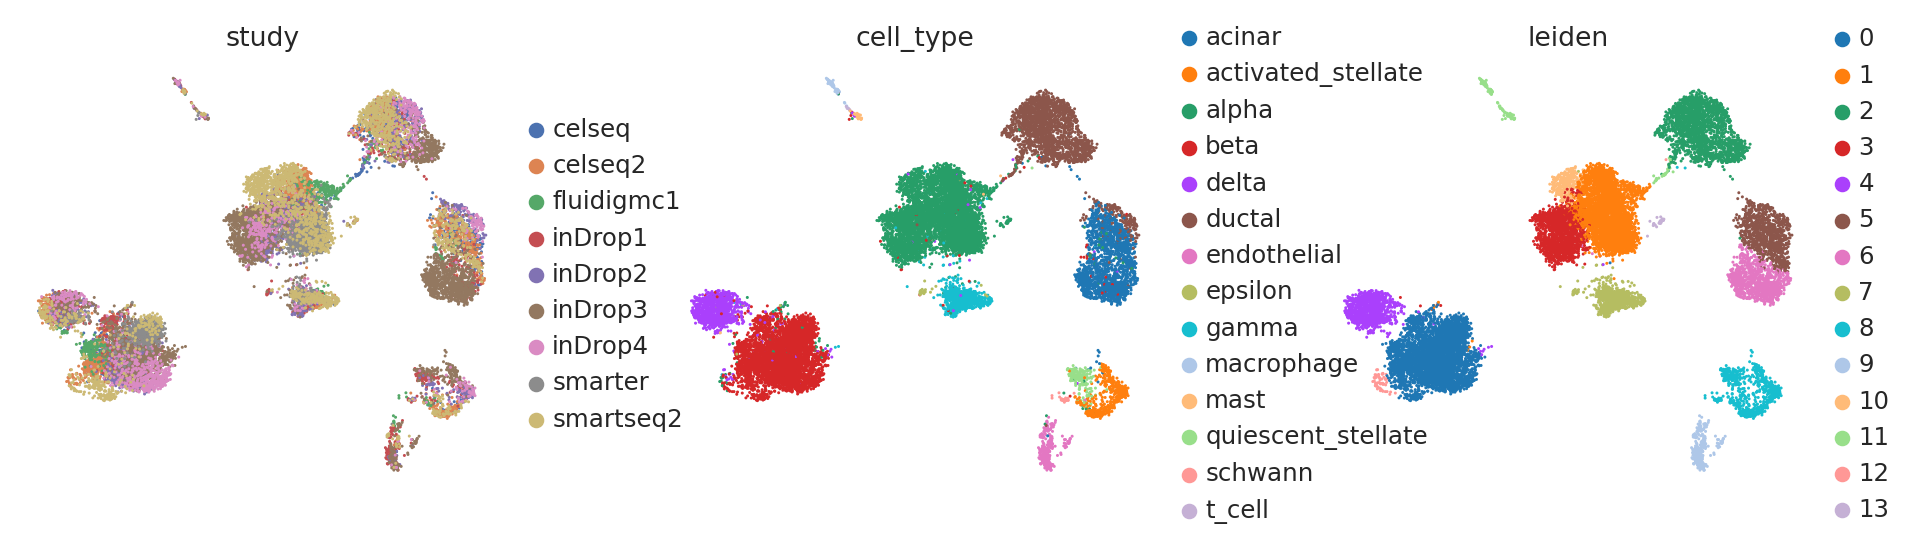

In [11]:
sc.pp.neighbors(adata_scanorama_raw, use_rep='X_scanorama')
sc.tl.umap(adata_scanorama_raw)
sc.tl.leiden(adata_scanorama_raw, resolution=0.7)
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scanorama_raw, color=['study', 'cell_type', 'leiden'], ncols=3, frameon=False, show=False)
    plt.savefig('figures/fig2/pancreas_scanorama_raw_umap.pdf', bbox_inches='tight')

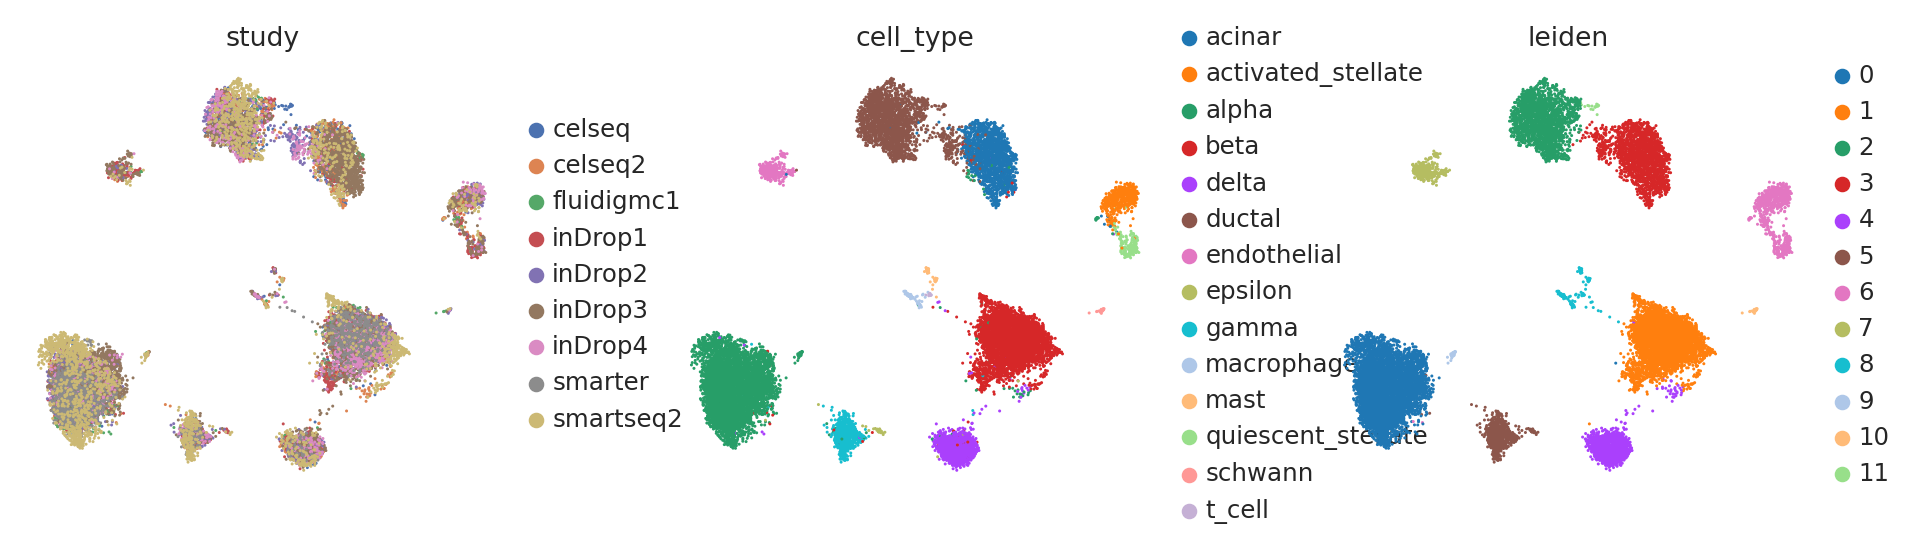

In [12]:
adata_scanorama_benchmark = sc.read('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_scanorama.h5ad')
sc.pp.neighbors(adata_scanorama_benchmark, use_rep='X_scanorama_prior')
sc.tl.umap(adata_scanorama_benchmark)
sc.tl.leiden(adata_scanorama_benchmark, resolution=0.7)
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scanorama_benchmark, color=['study', 'cell_type', 'leiden'], ncols=3, frameon=False, show=False)
    plt.savefig('figures/fig2/pancreas_scanorama_benchmark_prior_umap.pdf', bbox_inches='tight')

In [1]:
import pickle
import scib_metrics as scib
with open('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/bm_scanorama.pkl', 'rb') as f:
    bm = pickle.load(f)

/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/s

In [10]:
bm._results.columns = ['scanorama_prior'+str(i) for i in range((bm._results.shape[1]-1))] + ['Metric Type']

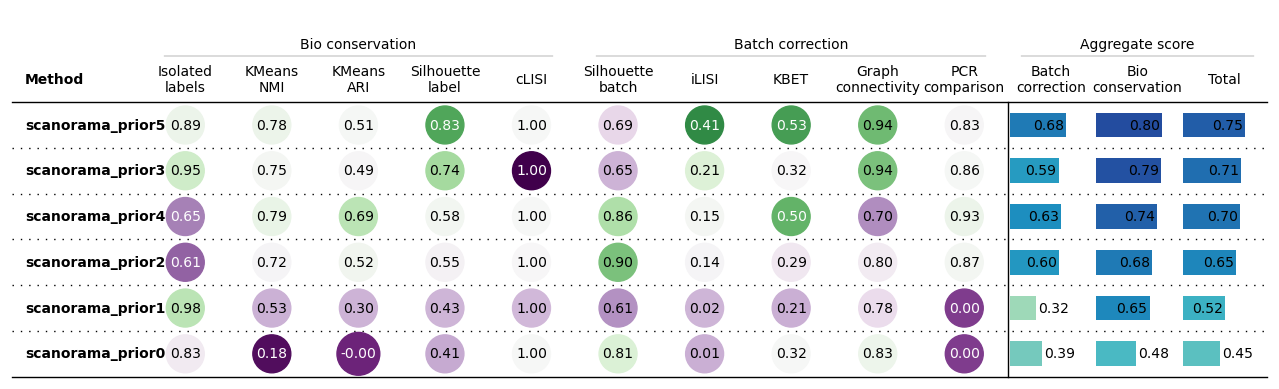

In [11]:
bm.plot_results_table(min_max_scale=False)

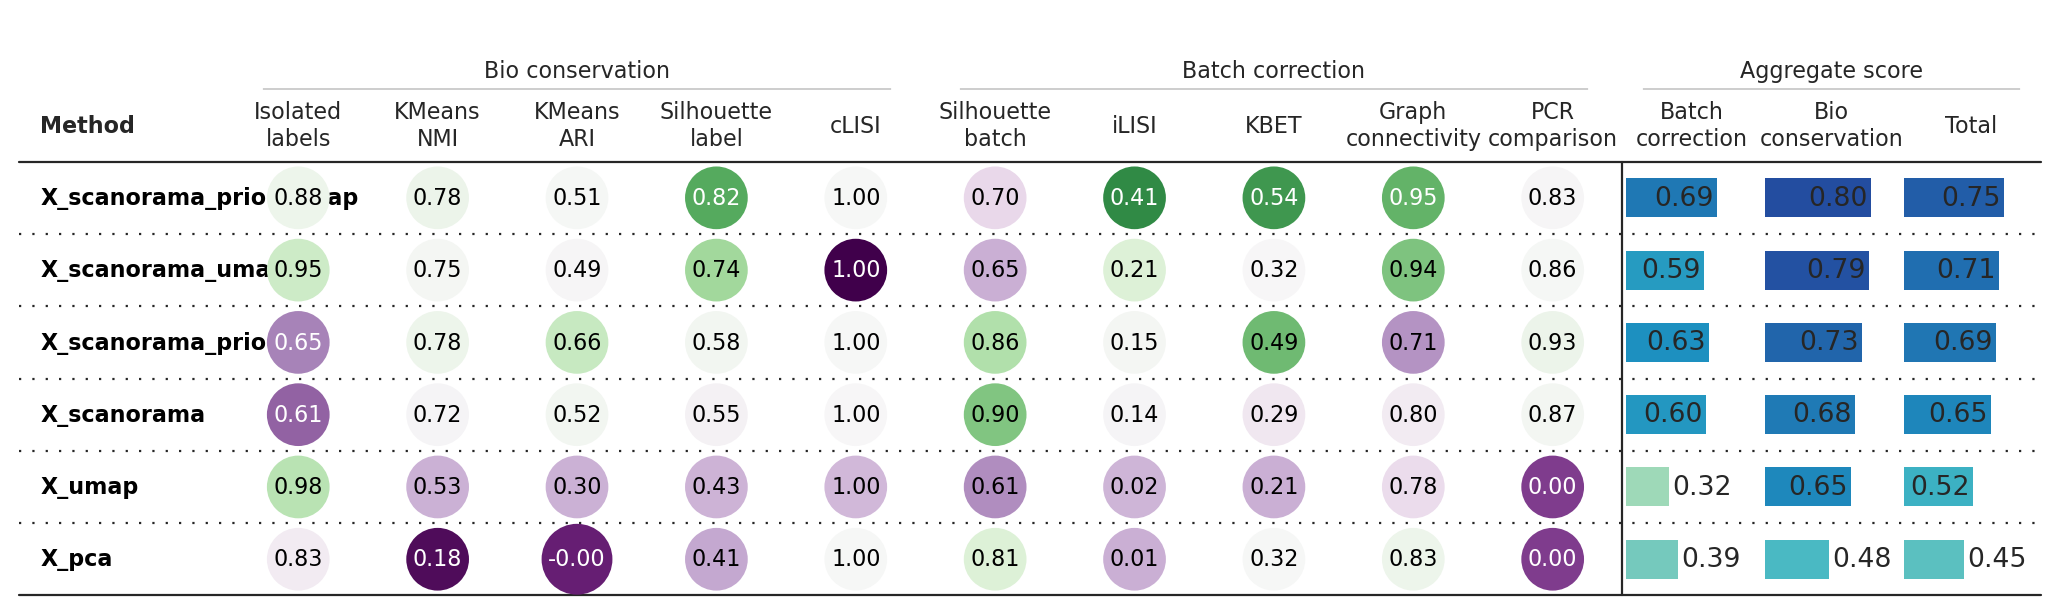

In [14]:
bm.plot_results_table(save_dir='figures/fig2', min_max_scale=False)

## cellhint

In [32]:
import pickle
import sys
sys.path.append('/home/wu/datb1/AutoExtractSingleCell/cellhint_prior')
import cellhint

with open('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_cellhint.pkl', 'rb') as f:
    cellhint_prior_alignment = pickle.load(f)
with open('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_raw_cellhint.pkl', 'rb') as f:
    cellhint_raw_alignment = pickle.load(f)

In [33]:
# map quiescent_stellate acrnoyms to the full names
acronyms = {'quiescent_stellate': 'QS', 
            'activated_stellate': 'AS', 
            'macrophage': 'Mac',
            'endothelial': 'Endo'}

cellhint_raw_alignment.relation = cellhint_raw_alignment.relation.replace(acronyms)
cellhint_prior_alignment.relation = cellhint_prior_alignment.relation.replace(acronyms)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 26 glyphs before
Glyph names: ['.notdef', '.null', 'D', 'a', 'c', 'd', 'e', 'f', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 39, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
Closed glyph list over 'GSUB': 31 glyphs after
Glyph names: ['.notdef', '.null', 'D', 'a', 'c', 'd', 'e', 'f', 'fi', 'fl', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u', 'uniFB00', 'uniFB03', 'uniFB04']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 39, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 5034, 5035, 5036, 5037, 5038]
Closing glyph list over 'glyf': 31 glyphs before
Glyph names: ['.notdef', '.null

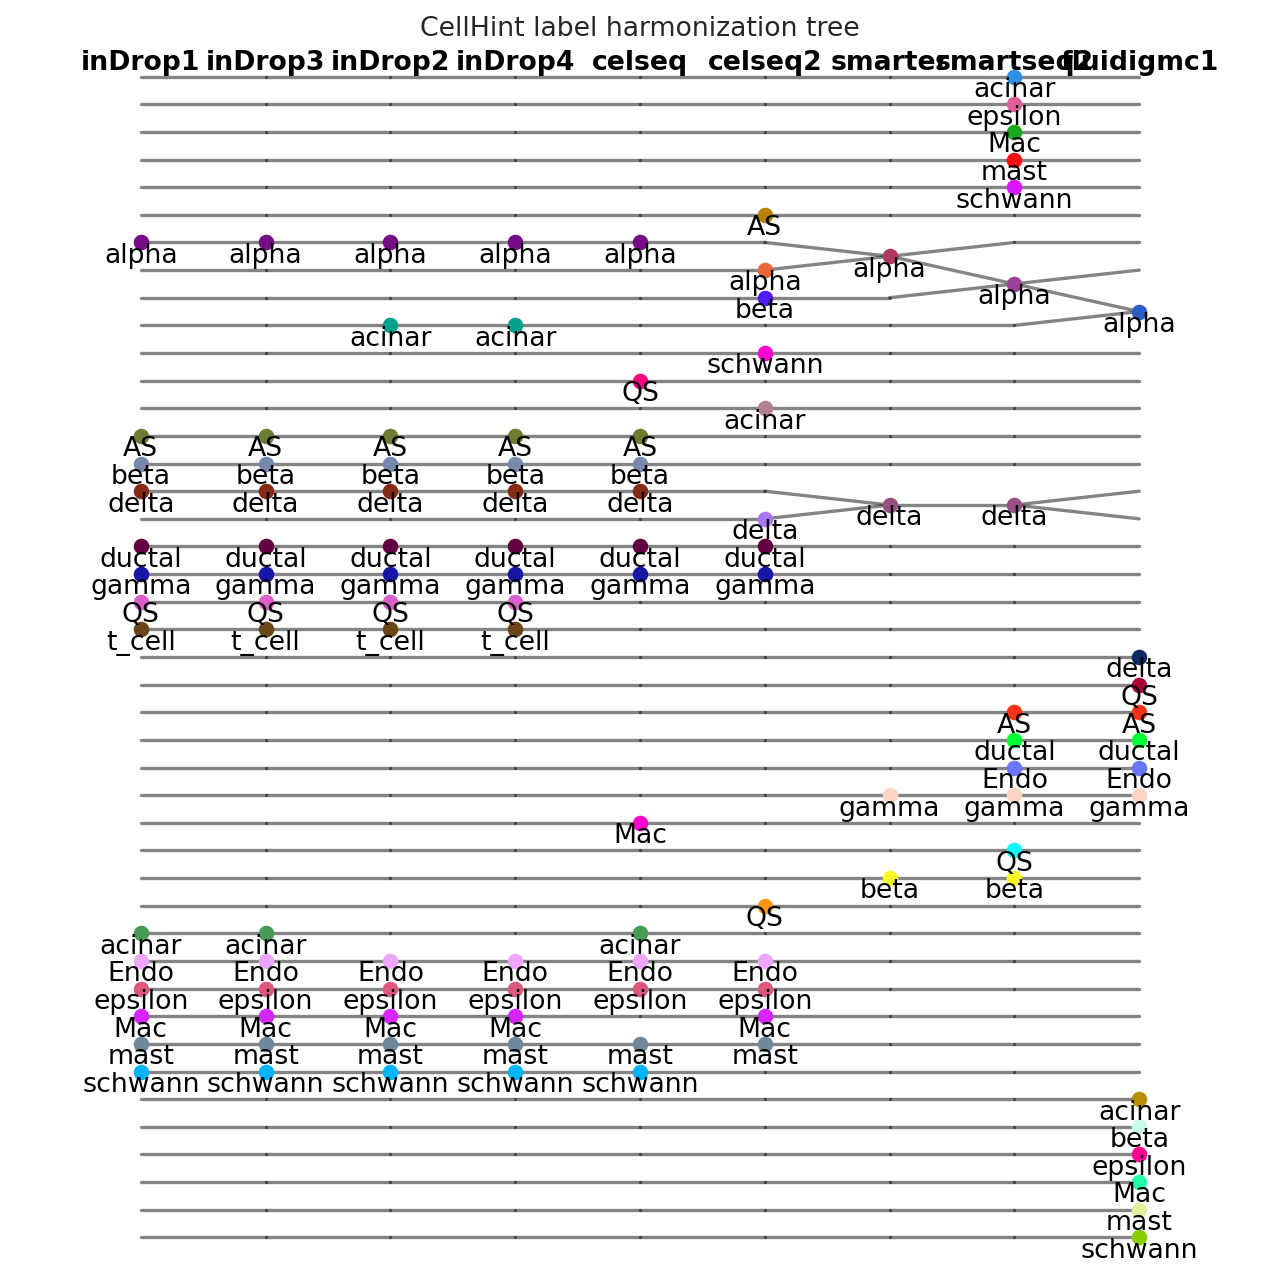

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 26 glyphs before
Glyph names: ['.notdef', '.null', 'D', 'a', 'c', 'd', 'e', 'f', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 39, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
Closed glyph list over 'GSUB': 31 glyphs after
Glyph names: ['.notdef', '.null', 'D', 'a', 'c', 'd', 'e', 'f', 'fi', 'fl', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u', 'uniFB00', 'uniFB03', 'uniFB04']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 39, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 5034, 5035, 5036, 5037, 5038]
Closing glyph list over 'glyf': 31 glyphs before
Glyph names: ['.notdef', '.null

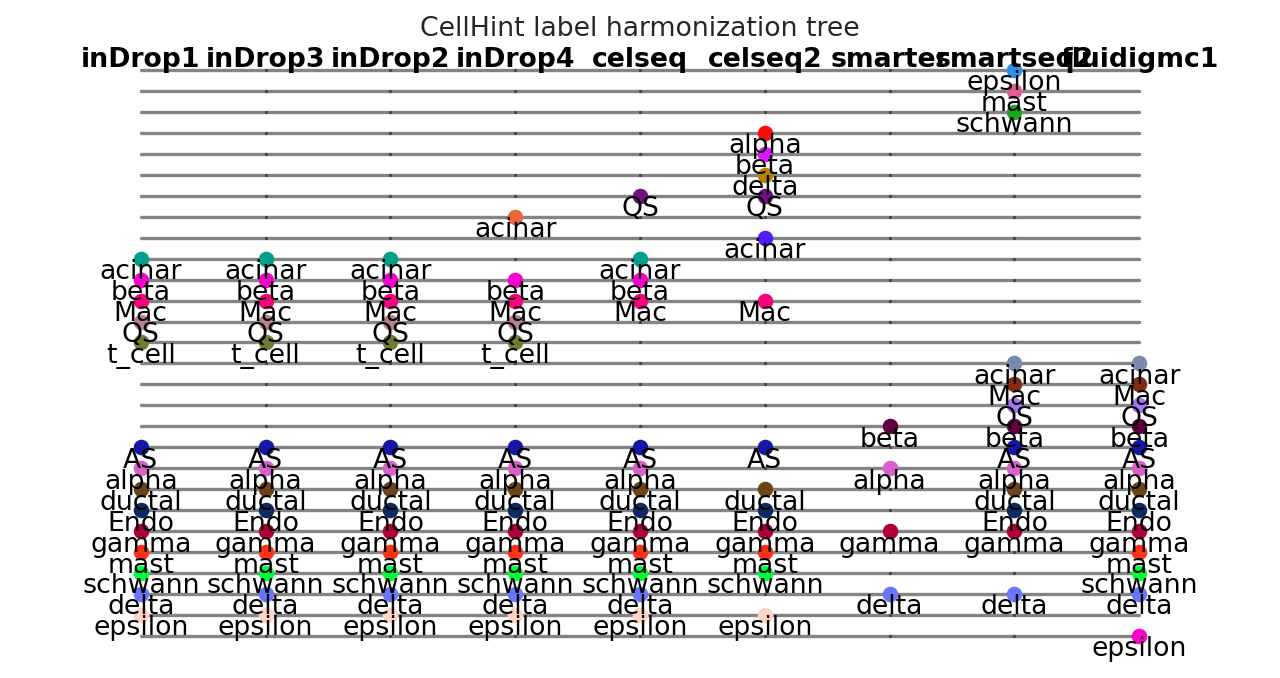

In [34]:
cellhint.treeplot(cellhint_raw_alignment, figsize=(10, 10), save='figures/fig2/pancreas_cellhint_raw_treeplot.pdf')
cellhint.treeplot(cellhint_prior_alignment, figsize=(10, 5), save='figures/fig2/pancreas_cellhint_prior_treeplot.pdf')

/home/wu/mambaforge/envs/scanpy/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
... storing 'cell_type_specific' as categorical
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:1263: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 23 glyphs before
Glyph names

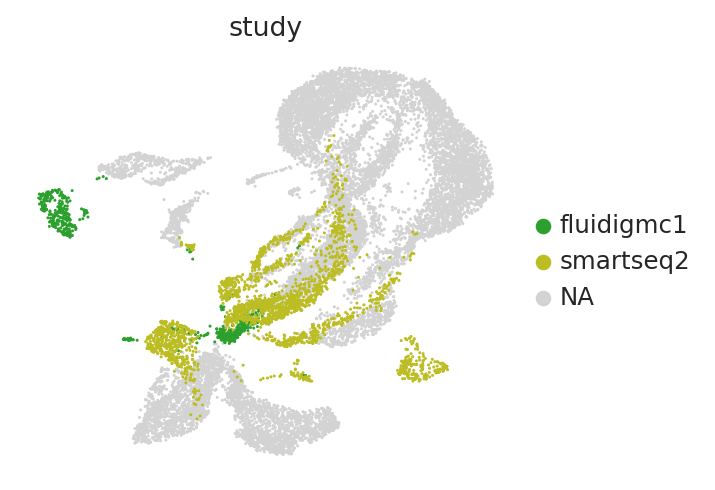

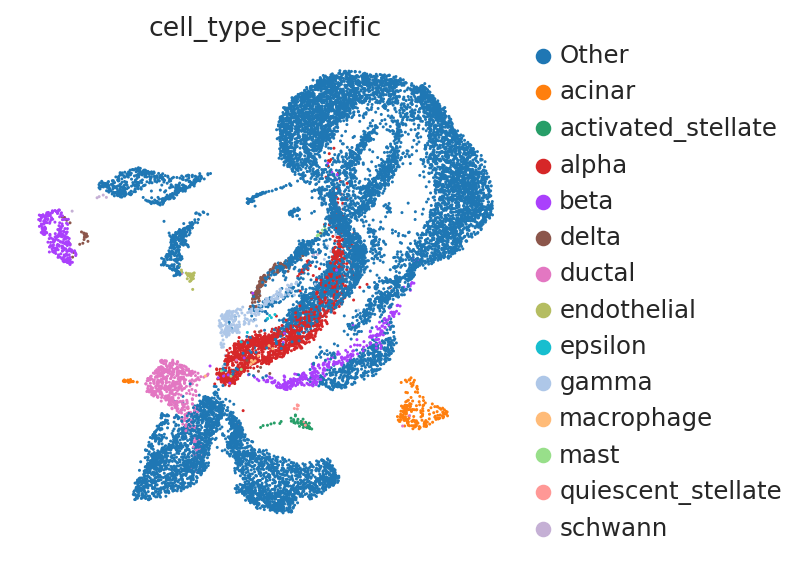

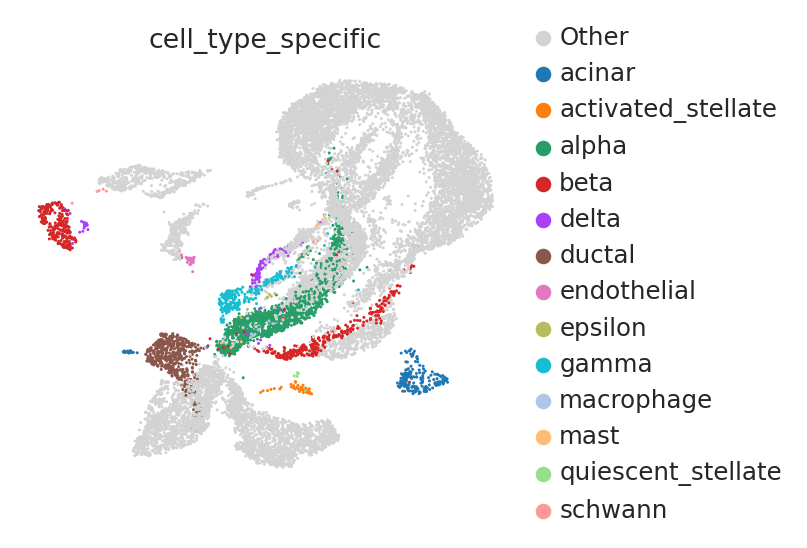

In [41]:
adata_raw = sc.read('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_raw_cellhint.h5ad')
adata_raw.obs['cell_type_specific'] = adata_raw.obs['cell_type'].astype(str).copy()
adata_raw.obs.loc[~adata_raw.obs.study.str.contains('smartseq2|fluidigmc1'), 'cell_type_specific'] = 'Other'

with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_raw, color=['study'], groups=['smartseq2', 'fluidigmc1'], frameon=False, show=False)
    plt.savefig('figures/fig2/pancreas_cellhint_raw_subset_ds_umap.pdf', bbox_inches='tight')
# full panel but only display data for the first two groups
sc.pl.umap(adata_raw, color=['cell_type_specific'], frameon=False, show=False)
adata_raw.uns['cell_type_specific_colors'] = ['lightgray'] + adata_raw.uns['cell_type_specific_colors'][:-1]
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_raw, color=['cell_type_specific'], frameon=False, show=False)
    plt.savefig('figures/fig2/pancreas_cellhint_raw_subset_ct_umap.pdf', bbox_inches='tight')

/home/wu/mambaforge/envs/scanpy/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
... storing 'cell_type_specific' as categorical
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:1263: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 23 glyphs before
Glyph names

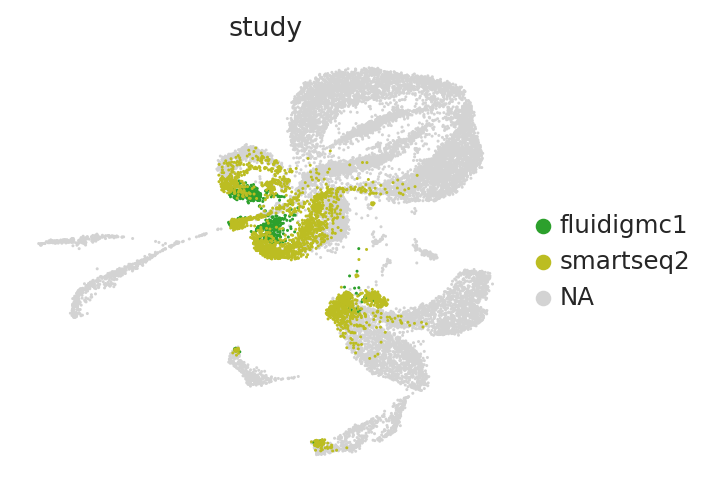

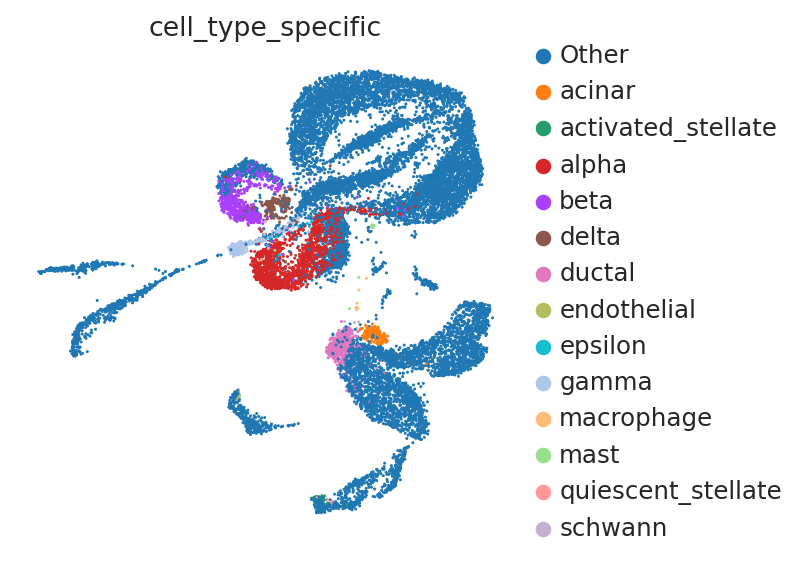

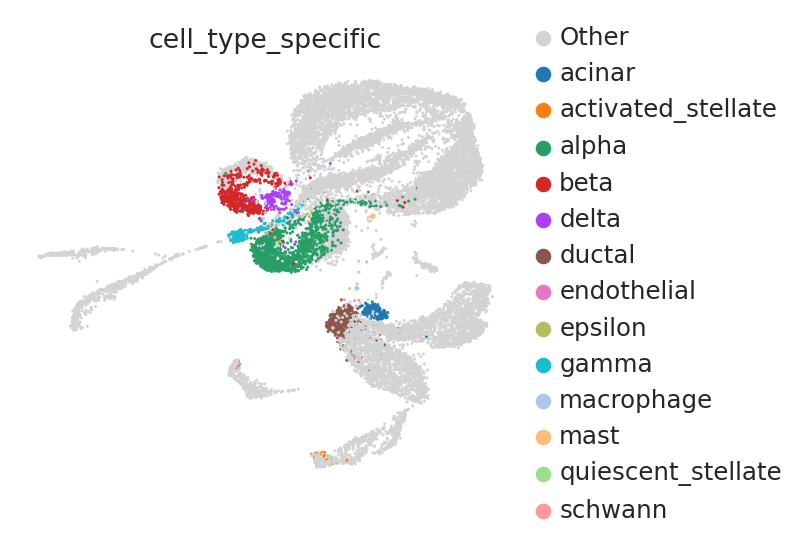

In [37]:
adata = sc.read('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_cellhint.h5ad')
adata.obs['cell_type_specific'] = adata.obs['cell_type'].astype(str).copy()
adata.obs.loc[~adata.obs.study.str.contains('smartseq2|fluidigmc1'), 'cell_type_specific'] = 'Other'

with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata, color=['study'], groups=['smartseq2', 'fluidigmc1'], frameon=False, show=False)
    plt.savefig('figures/fig2/pancreas_cellhint_prior_subset_ds_umap.pdf', bbox_inches='tight')
# full panel but only display data for the first two groups
sc.pl.umap(adata, color=['cell_type_specific'], frameon=False, show=False)
adata.uns['cell_type_specific_colors'] = ['lightgray'] + adata.uns['cell_type_specific_colors'][:-1]
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata, color=['cell_type_specific'], frameon=False, show=False)
    plt.savefig('figures/fig2/pancreas_cellhint_prior_subset_ct_umap.pdf', bbox_inches='tight')

## Label chage

In [15]:
adata_scan_change = sc.read('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_scanorama_label_change.h5ad')

In [16]:
sc.pp.neighbors(adata_scan_change, use_rep='X_scanorama')
sc.tl.umap(adata_scan_change)

In [60]:
# alldata['celseq2'].obs.cell_type = alldata['celseq2'].obs.cell_type.astype(str)
# alldata['celseq2'].obs.cell_type[alldata['celseq2'].obs.cell_type == 'beta'] = 'Unknown' # test for missing cell type
# alldata['inDrop3'].obs.cell_type = alldata['inDrop3'].obs.cell_type.astype(str)
# alldata['inDrop3'].obs.cell_type[alldata['inDrop3'].obs.cell_type == 'ductal'] = 'gamma' # test for wrong cell type
# alldata['inDrop1'].obs.cell_type = alldata['inDrop1'].obs.cell_type.astype(str)
# alldata['inDrop1'].obs.cell_type[alldata['inDrop1'].obs.cell_type == 'alpha'] = 'Alpha cell' # test for cell type name change

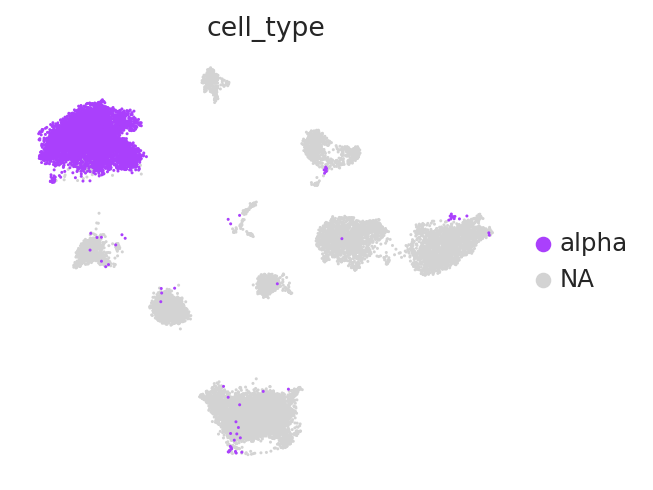

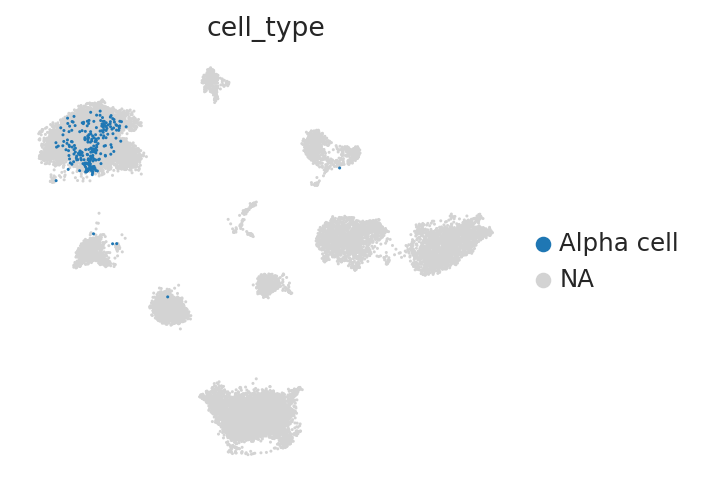

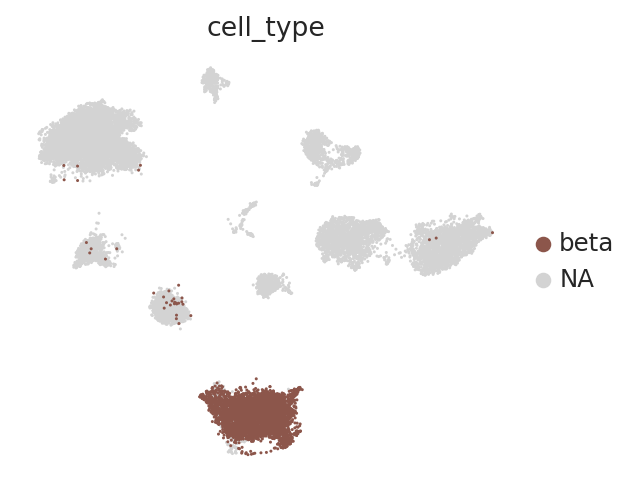

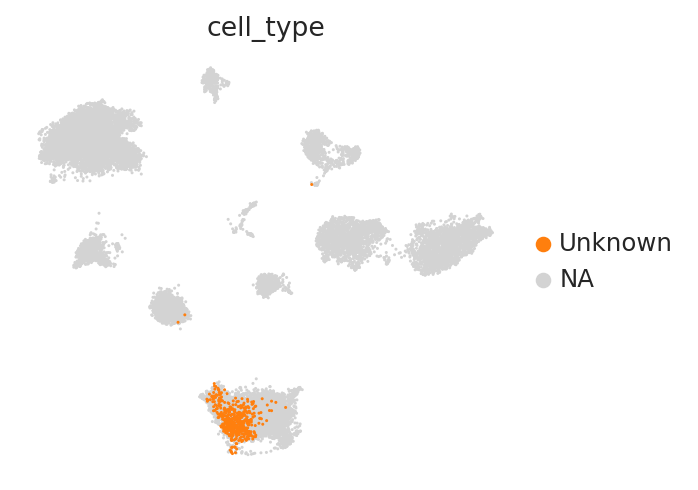

In [17]:
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scan_change, color='cell_type', groups=['alpha'], frameon=False, show=False)
    plt.savefig('figures/fig2/change_scanorama_alpha_ref.pdf', bbox_inches='tight')

with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scan_change, color='cell_type', groups=['Alpha cell'], frameon=False, show=False)
    plt.savefig('figures/fig2/change_scanorama_alpha_cell.pdf', bbox_inches='tight')

with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scan_change, color='cell_type', groups=['beta'], frameon=False, show=False)
    plt.savefig('figures/fig2/change_scanorama_beta_ref.pdf', bbox_inches='tight')
    
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scan_change, color='cell_type', groups=['Unknown'], frameon=False, show=False)
    plt.savefig('figures/fig2/change_scanorama_unknown.pdf', bbox_inches='tight')

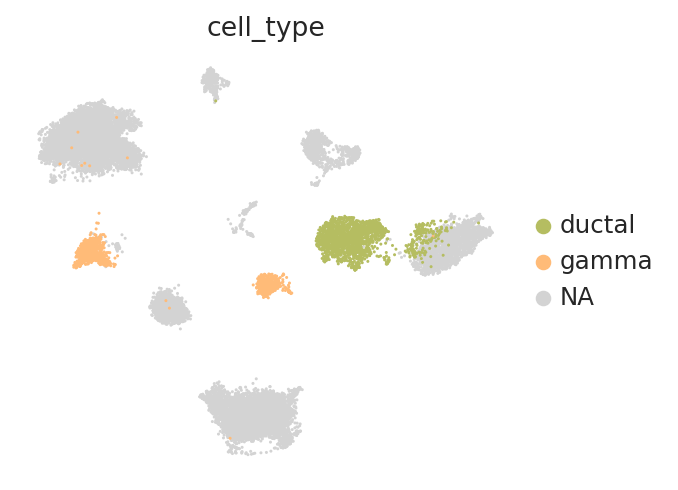

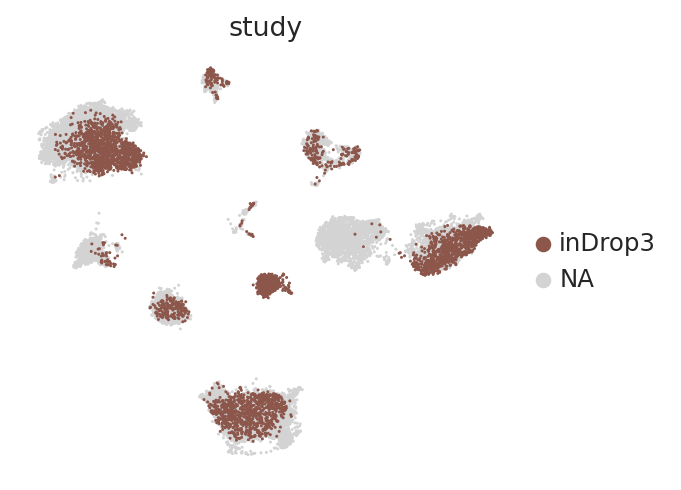

In [18]:
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scan_change, color=['cell_type'], groups=['gamma', 'ductal'], frameon=False, show=False)
    plt.savefig('figures/fig2/change_scanorama_gamma_ductal.pdf', bbox_inches='tight')
    plt.show()
    
with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_scan_change, color=['study'], groups=['inDrop3'], frameon=False, show=False)
    plt.savefig('figures/fig2/change_scanorama_indrop3.pdf', bbox_inches='tight')
    plt.show()

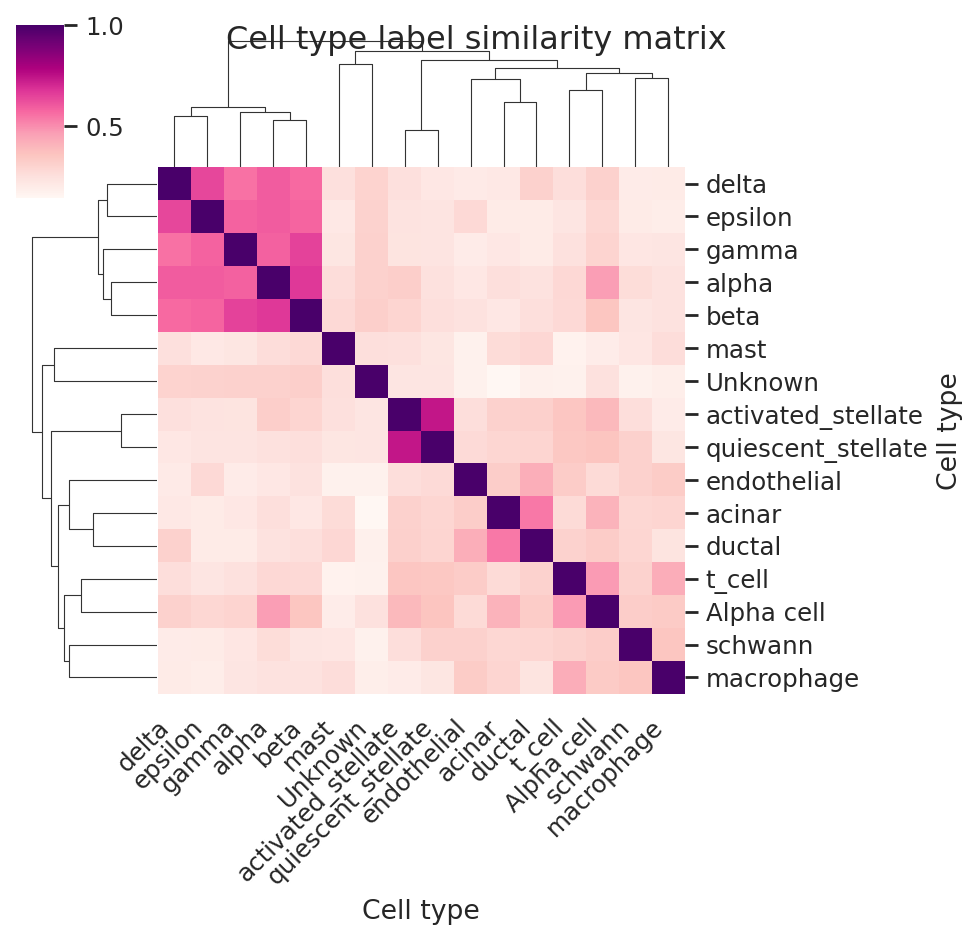

In [19]:
similarity_matrix = pd.read_csv('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/similarity_matrix_label_changed.csv', index_col=0)
g = sns.clustermap(similarity_matrix, figsize=(6, 6), cmap='RdPu')
g.ax_heatmap.set_xlabel('Cell type')
g.ax_heatmap.set_ylabel('Cell type')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.suptitle('Cell type label similarity matrix')
plt.savefig('figures/fig2/change_scanorama_similarity_matrix.pdf', bbox_inches='tight')

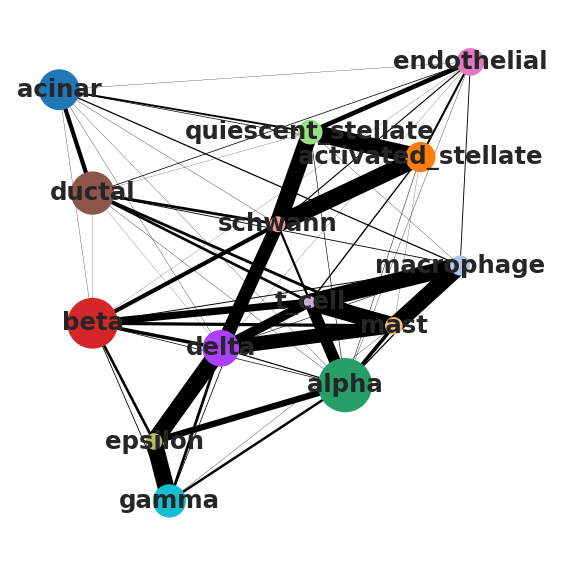

In [20]:
sc.pp.neighbors(adata_scanorama_benchmark, n_neighbors=30, use_rep='X_pca')
sc.tl.paga(adata_scanorama_benchmark, groups='cell_type')
sc.pl.paga(adata_scanorama_benchmark, color=['cell_type'], frameon=False)

/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/wu/mambaforge/envs/AutoExtract/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


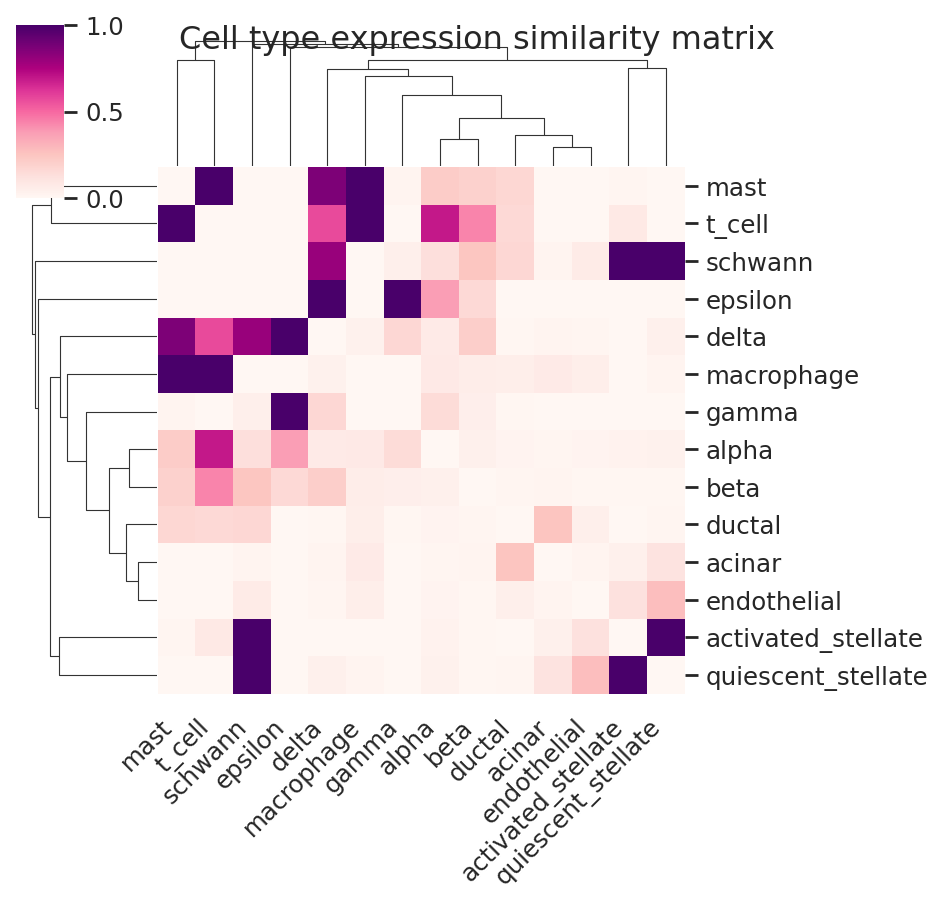

In [21]:
# # with rc_context({'figure.figsize': (6, 6)}):
# #     sc.pl.paga(adata_scanorama_benchmark, color='cell_type', frameon=False, show=False)

cell_type_list = adata_scanorama_benchmark.obs['cell_type'].cat.categories
similarity_matrix_by_expression = adata_scanorama_benchmark.uns['paga']['connectivities'].toarray()
similarity_matrix_by_expression = pd.DataFrame(similarity_matrix_by_expression, index=cell_type_list, columns=cell_type_list)
g = sns.clustermap(similarity_matrix_by_expression, figsize=(6, 6), cmap='RdPu')
plt.suptitle('Cell type expression similarity matrix')
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')
plt.savefig('figures/fig2/pancreas_scanorama_benchmark_paga_similarity_matrix.pdf', bbox_inches='tight')

In [69]:
# adata.obs.cell_type = adata.obs.cell_type.astype(str)
# adata.obs.loc[(adata.obs.cell_type == 'beta') & (adata.obs.study == 'celseq2'), 'cell_type'] = 'Unknown' # test for missing cell type
# adata.obs.loc[(adata.obs.cell_type == 'ductal') & (adata.obs.study == 'inDrop3'), 'cell_type'] = 'gamma' # test for wrong cell type
# adata.obs.loc[(adata.obs.cell_type == 'alpha') & (adata.obs.study == 'inDrop1'), 'cell_type'] = 'Alpha cell' # test for alternative cell type name

In [49]:
adata_cellhint_change = sc.read('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_cellhint_label_change.h5ad')

/home/wu/mambaforge/envs/scanpy/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:1263: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/wu/scanpy/scanpy/plotting/_tools/scatterplots.py:399: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 15 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'N', 'a', 'c', 'e', 'h', 'l', 'nonmarkingreturn', 'p', 'space', 't', 'underscore', 'y']
Glyph IDs:   [0, 1, 2, 3, 36, 49, 66, 68, 70, 72, 75, 79, 83, 87, 92]
Closed glyph list over 'GSUB': 15 glyphs after
Glyph names: ['.notdef', '.null', 

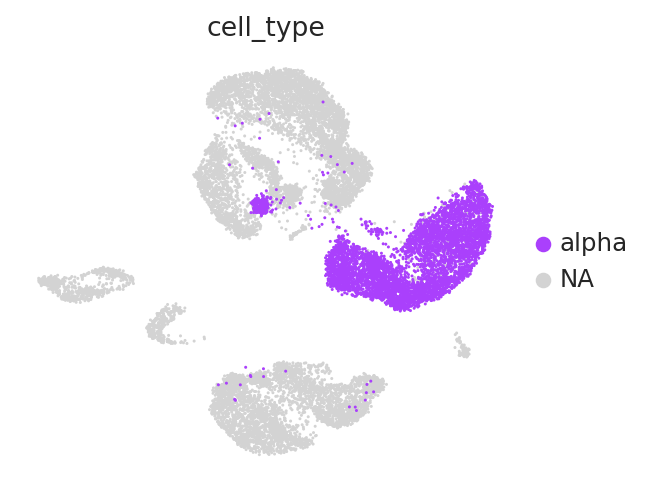

In [50]:
with open('/home/wu/datb1/AutoExtractSingleCell/scanorama_prior/data/output_cellhint_label_change.pkl', 'rb') as f:
    cellhint_change = pickle.load(f)

with rc_context({'figure.figsize': (4, 3.5)}):
    sc.pl.umap(adata_cellhint_change, color='cell_type', groups=['alpha'], frameon=False, show=False)
    plt.savefig('figures/fig2/change_cellhint_alpha_ref.pdf', bbox_inches='tight')

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 26 glyphs before
Glyph names: ['.notdef', '.null', 'D', 'a', 'c', 'd', 'e', 'f', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 39, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88]
Closed glyph list over 'GSUB': 31 glyphs after
Glyph names: ['.notdef', '.null', 'D', 'a', 'c', 'd', 'e', 'f', 'fi', 'fl', 'four', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'q', 'r', 's', 'space', 't', 'three', 'two', 'u', 'uniFB00', 'uniFB03', 'uniFB04']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 23, 39, 68, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 5034, 5035, 5036, 5037, 5038]
Closing glyph list over 'glyf': 31 glyphs before
Glyph names: ['.notdef', '.null

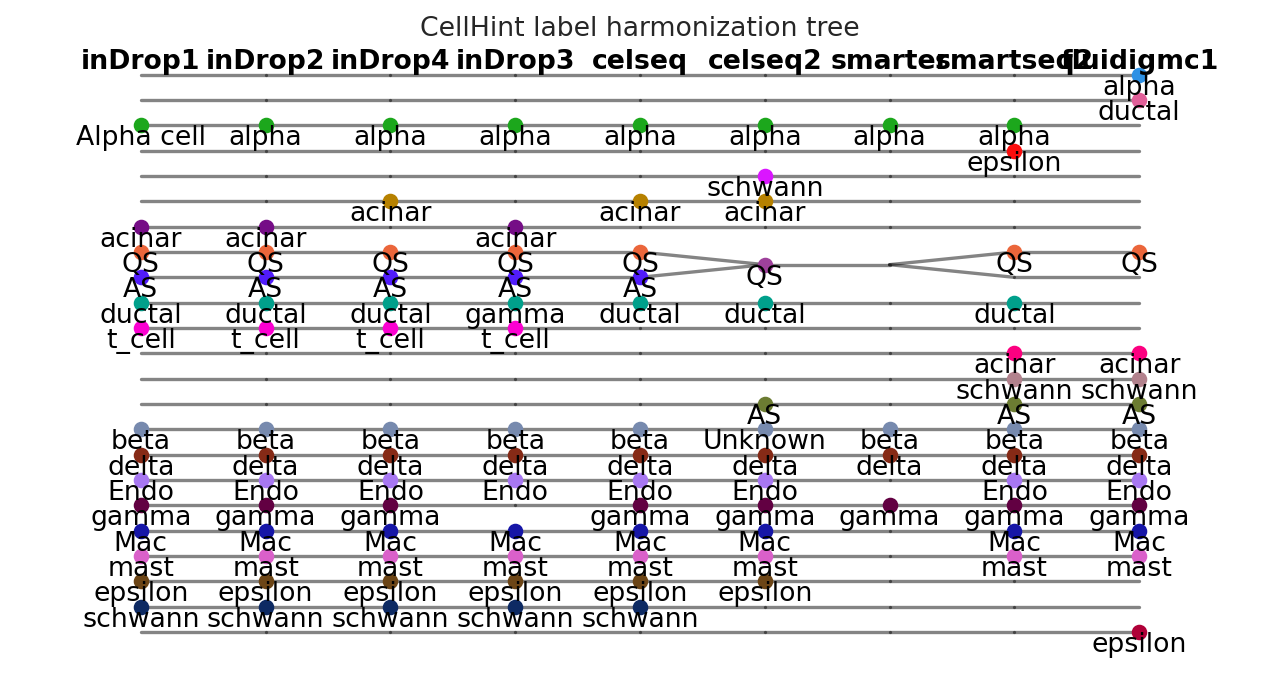

In [51]:
cellhint_change.relation = cellhint_change.relation.replace(acronyms)
cellhint.treeplot(cellhint_change, figsize=(10, 5 ), save='figures/fig2/pancreas_cellhint_change_treeplot.pdf')